# Ageing Score Calculation
## Xiaonan Wang
## 23May2023

In [2]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


In [3]:
adata = sc.read('./write/HSC_Immature.h5ad')

In [4]:
AL = np.genfromtxt('/home/xw251/rds/rds-bg200-hphi-gottgens/users/xw251/Lab_Members/Niki/GSE157832/age_gene20.txt', dtype=str)
print(AL)
AL = np.intersect1d(AL, adata.raw.var_names)
print(AL)

['Selp' 'Mt1' 'Nupr1' 'Plscr2' 'Clec1a' 'Gstm2' 'Enpp5' 'Itgb3' 'Mt2'
 'Clca3a1' 'Zg16' 'Sbspon' 'Trpc1' 'Gpr183' 'Klhl4' 'Ptprk' 'Vwf' 'Cd38'
 'Neo1' 'Fhl1']
['Cd38' 'Clca3a1' 'Clec1a' 'Enpp5' 'Fhl1' 'Gpr183' 'Gstm2' 'Itgb3' 'Klhl4'
 'Mt1' 'Mt2' 'Neo1' 'Nupr1' 'Plscr2' 'Ptprk' 'Sbspon' 'Selp' 'Trpc1' 'Vwf'
 'Zg16']


In [5]:
adata_norm = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, obsm=adata.obsm)

In [6]:
sc.pp.scale(adata_norm)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [7]:
sc.tl.score_genes(adata_norm, AL)

computing score 'score'
    finished: added
    'score', score of gene set (adata.obs).
    649 total control genes are used. (0:00:00)


In [8]:
adata.obs['AS_score'] = adata_norm.obs['score']

Adh5KO v.s. DKO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.274e-02 U_stat=4.636e+03
Aldh2KO v.s. DKO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.142e-02 U_stat=3.897e+03
WT v.s. DKO: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.602e-03 U_stat=3.676e+03


(<AxesSubplot:title={'center':'LTHSC'}, ylabel='AS_score'>,
  <statannot.StatResult.StatResult at 0x2b4295b02160>])

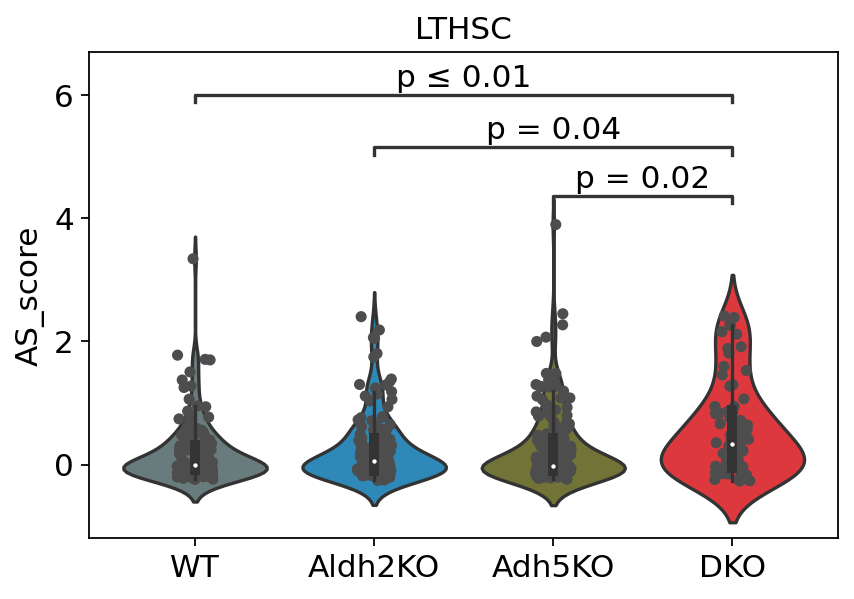

In [10]:
# Figure2G
from statannot import add_stat_annotation
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
df = adata[adata.obs['Nestorowa_CT'] == 'LTHSC'].obs[['AS_score', 'Condition']]
sns.violinplot(x='Condition', y='AS_score', data=df,  scale='width', ax=ax, palette=['#657F81', '#1790d0', '#7b7d2d', '#FA1C26'])
sns.stripplot(x="Condition", y="AS_score", data=df, jitter=True, zorder=1, color=".3")
ax.grid(False)
ax.set_xlabel('')
ax.set_title('LTHSC')
add_stat_annotation(ax, data=df, x='Condition', y='AS_score',
                        box_pairs=[('WT', 'DKO'),('Aldh2KO', 'DKO'), ("Adh5KO", "DKO")],
                        test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)